# Import Packages

In [345]:
import json
import operator
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from twython import Twython
from datetime import datetime
from dateutil import parser
from pandas import json_normalize

# Define functions

In [346]:
def load_ext_user_timeline(twitter_client, screen_name):
    tweets = []
    try:
        user_timeline = twitter_client.get_user_timeline(screen_name=screen_name,count=200, tweet_mode='extended')
    except TwythonError as e:
        print(e)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        tweets.append(tweet)
    # Count could be less than 200, see:
    # https://dev.twitter.com/discussions/7513
    while len(user_timeline) != 0: 
        try:
            user_timeline = twitter_client.get_user_timeline(
                screen_name=screen_name,count=200,max_id=user_timeline[len(user_timeline)-1]['id']-1, tweet_mode='extended')
        except TwythonError as e:
            print(e)
        for tweet in user_timeline:
            # Add whatever you want from the tweet, here we just add the text
            tweets.append(tweet)
    # Number of tweets the user has made
    print(len(tweets))
    return tweets


def get_tweets(id_):
    tweets = load_ext_user_timeline(twitter_client, id_)
    return tweets

# Create Twitter client

In [347]:
with open('../twitter/credentials.json") as infile:
    credentials = json.load(infile)

twitter_client = Twython(credentials["consumer_key"],
                         credentials["consumer_secret"],
                         credentials["access_token"],
                         credentials["access_token_secret"])

# Load tweets, get data frames and store them

In [31]:
tweets[0]

{'created_at': 'Tue Feb 11 16:39:59 +0000 2020',
 'id': 1227271072535498754,
 'id_str': '1227271072535498754',
 'full_text': 'When Jerome Powell started his testimony today, the Dow was up 125, &amp; heading higher. As he spoke it drifted steadily downward, as usual, and is now at -15. Germany &amp; other countries get paid to borrow money. We are more prime, but Fed Rate is too high, Dollar tough on exports.',
 'truncated': False,
 'display_text_range': [0, 286],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 25073877,
  'id_str': '25073877',
  'name': 'Donald J. Trump',
  'screen_name': 'realDonaldTrump',
  'location': 'Washington, DC',
  'description': '45th President of the Un

# Read dataframes

In [538]:
f_name ='../data/raw_data_realDonaldTrump.csv'
raw_data = pd.read_csv(f_name)
raw_data
len(raw_data)

2194

# Re-Order depending on number of retweets

In [376]:
data_sort = raw_data.sort_values(by='retweet_count', ascending=False)
data_sort = raw_data.iloc[:10]

data_sort[['retweet_count', 'id', 'id_str']].iloc[:10]
save_df = data_sort.iloc[:10].to_csv('../data/top10_retweeted.csv', index=False)

# Add weekday, month, year, hour to dataframe

In [539]:
raw_data['datetime'] = pd.to_datetime(raw_data['created_at'], format='%a %b %d %H:%M:%S %z %Y')
raw_data['weekday']  = raw_data['datetime'].dt.day_name()
raw_data['month']    = raw_data['datetime'].dt.month_name()
raw_data['year']     = raw_data['datetime'].dt.year
raw_data['hour']     = raw_data['datetime'].dt.hour
raw_data['date']     = raw_data['datetime'].dt.date

In [325]:
raw_data.loc[raw_data['hour']==23]

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,datetime,weekday,month,year,hour,date
98,Sat Feb 08 23:54:54 +0000 2020,1226293358026526725,1226293358026526725,RT @parscale: Karma,False,"[0, 19]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:54:54+00:00,Saturday,February,2020,23,2020-02-08
99,Sat Feb 08 23:54:40 +0000 2020,1226293300640075776,1226293300640075776,RT @DonaldJTrumpJr: It’s an honor to be in the...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:54:40+00:00,Saturday,February,2020,23,2020-02-08
100,Sat Feb 08 23:53:52 +0000 2020,1226293097832812544,1226293097832812544,RT @kayleighmcenany: .⁦@TeamTrump⁩ is coming t...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:53:52+00:00,Saturday,February,2020,23,2020-02-08
101,Sat Feb 08 23:53:39 +0000 2020,1226293043696951298,1226293043696951298,RT @GeauxScalise: This Week: @realDonaldTrump ...,False,"[0, 139]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:53:39+00:00,Saturday,February,2020,23,2020-02-08
102,Sat Feb 08 23:53:25 +0000 2020,1226292984909529089,1226292984909529089,RT @ScottforFlorida: Looking forward to joinin...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:53:25+00:00,Saturday,February,2020,23,2020-02-08
103,Sat Feb 08 23:52:53 +0000 2020,1226292851375562752,1226292851375562752,RT @kayleighmcenany: Watching this Democrat de...,False,"[0, 144]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:52:53+00:00,Saturday,February,2020,23,2020-02-08
104,Sat Feb 08 23:52:14 +0000 2020,1226292688057663488,1226292688057663488,RT @kayleighmcenany: These Dems are TALKING ab...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:52:14+00:00,Saturday,February,2020,23,2020-02-08
105,Sat Feb 08 23:51:57 +0000 2020,1226292615735316481,1226292615735316481,RT @kayleighmcenany: Make no mistake: the #Dem...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:51:57+00:00,Saturday,February,2020,23,2020-02-08
106,Sat Feb 08 23:51:29 +0000 2020,1226292499079102465,1226292499079102465,RT @kayleighmcenany: #DemDebate moderator: Wha...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:51:29+00:00,Saturday,February,2020,23,2020-02-08
107,Sat Feb 08 23:51:14 +0000 2020,1226292433148837888,1226292433148837888,"RT @FrancisBrennan: ""This was a week that clea...",False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-02-08 23:51:14+00:00,Saturday,February,2020,23,2020-02-08


# Plot weekday, month, year, hour dependence of the number of tweets

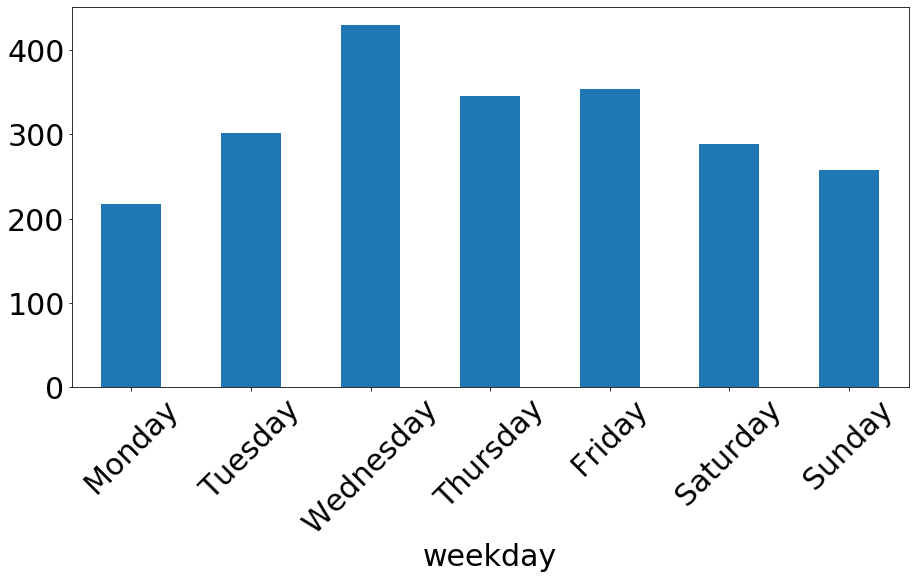

In [551]:
df_weekday = raw_data.groupby(['weekday']).agg({'datetime':'count'}).rename(columns={"datetime":"# of tweets"}).reset_index()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = df_weekday['weekday'].map(mapping)
df_weekday = df_weekday.iloc[key.argsort()].set_index('weekday')
fig, ax = plt.subplots(figsize=(15,7))
plot = df_weekday.plot(kind='bar', figsize=(15,7), rot=45, ax=ax, fontsize=30, legend=False)
plot.set_xlabel('weekday',fontsize=30)
fig.savefig('../plots/number_of_tweets_weekdaysort_dependence.png', bbox_inches = "tight")

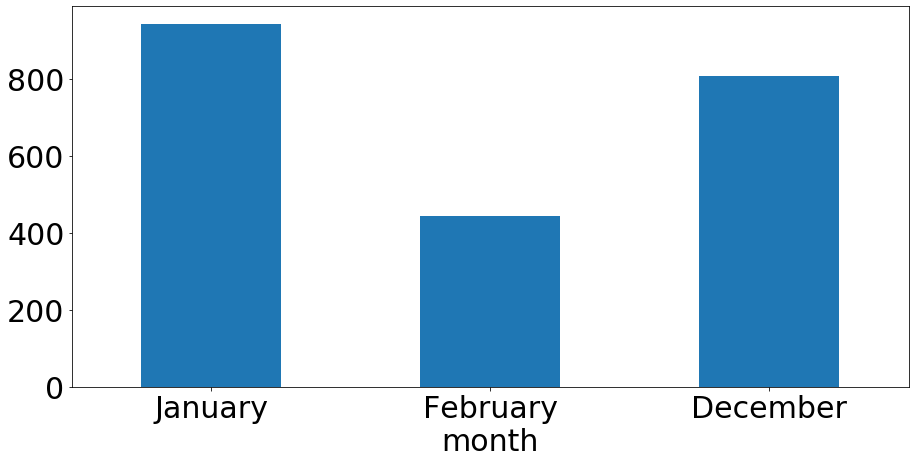

In [554]:
df_month = raw_data.groupby(['month']).agg({'datetime':'count'}).rename(columns={"datetime":"# of tweets"}).reset_index()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
mapping = {m: i for i, m in enumerate(months)}
key = df_month['month'].map(mapping)
df_month = df_month.iloc[key.argsort()].set_index('month')
fig, ax = plt.subplots(figsize=(15,7))
plot = df_month.plot(kind='bar', figsize=(15,7), rot=0, ax=ax, fontsize=30, legend=False)
plot.set_xlabel('month',fontsize=30)
fig.savefig('../plots/number_of_tweets_month_dependence.png', bbox_inches = "tight")


In [357]:
df_year = raw_data.groupby(['year']).agg({'datetime':'count'}).rename(columns={"datetime":"count"}).reset_index()
df_year
#df_year.plot(kind='bar', figsize=(15,7))

,year,count
0,2019,808
1,2020,1386


      count
hour       
0        67
1        89
2        79
3        82
4       203
5       109
6        28
9         2
10        2
11       70
12      228
13      229
14      236
15      170
16       56
17       58
18       58
19       88
20       50
21       87
22      104
23       99


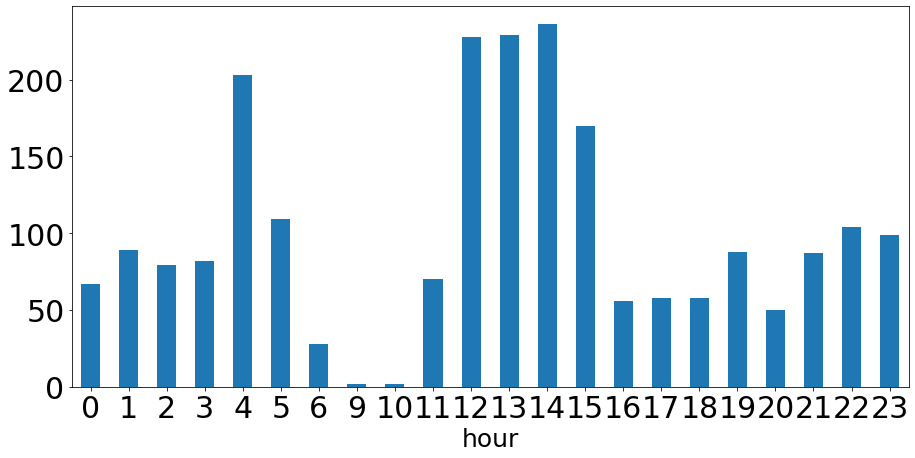

In [556]:
df_hour = raw_data.groupby(['hour']).agg({'datetime':'count'}).rename(columns={"datetime":"count"})
print(df_hour)
fig, ax = plt.subplots(figsize=(15,7))
plot = df_hour['count'].plot(kind='bar', figsize=(15,7), rot=0, ax=ax, fontsize=30, legend=False)
plot.set_xlabel('hour',fontsize=25)
fig.savefig('../plots/number_of_tweets_dayhour_dependence.png', bbox_inches = "tight")

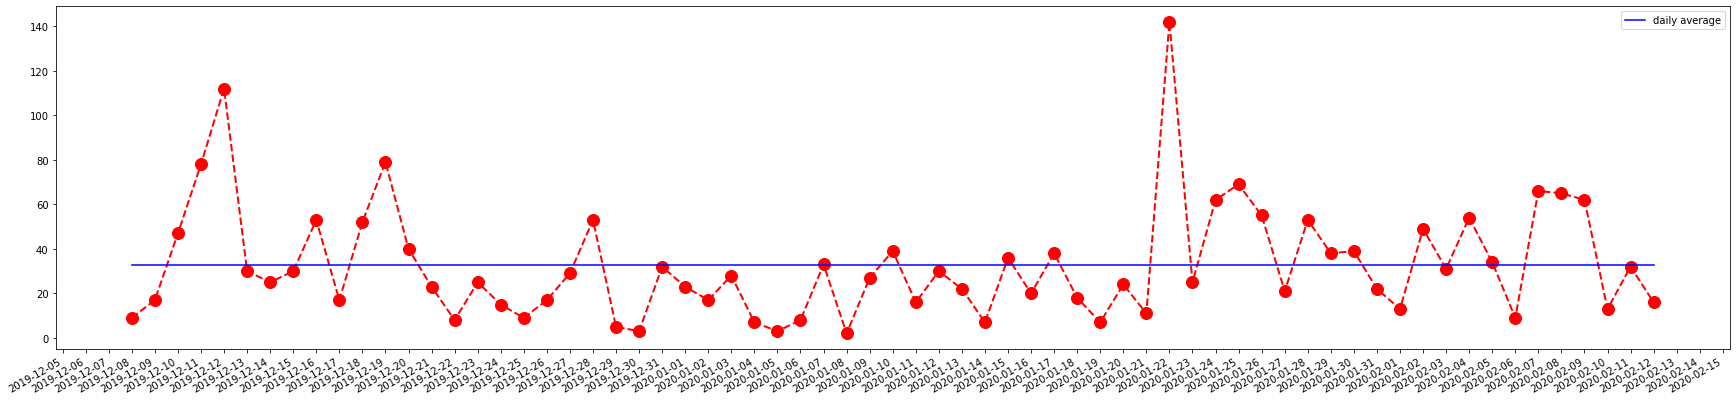

In [570]:
df_date = raw_data.groupby(['date'], as_index=False).agg({'datetime':'count'}).rename(columns={"datetime":"count"})
average_per_day = df_date['count'].sum()/len(df_date)
av = np.ones(len(df_date))
av = av*average_per_day
days = df_date['date']
counts = df_date['count']

fig, ax = plt.subplots(figsize=(30, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.plot(days, counts, 'ro--', linewidth=2, markersize=12)
plt.plot(days, av, 'b-', label='daily average')
plt.gcf().autofmt_xdate()
plt.rcParams.update({'font.size': 8})
plt.legend()
plt.show()
fig.savefig('../plots/number_of_tweets_time_evolution.png', bbox_inches = "tight")



# Check what happened on the '' peaks ''

In [462]:
df_date = df_date.sort_values(by='count', ascending=False).iloc[:3]
print(df_date)

df_date_text = raw_data.groupby('date')['full_text'].apply(list).reset_index()
print(df_date_text)
for dat in df_date['date']:
    df = df_date_text.loc[df_date_text['date']==dat]
    l_str = df['full_text']
    #print(l_str)


df_date.iloc[0]['date']

          date  count
45  2020-01-22    142
4   2019-12-12    112
11  2019-12-19     79
          date                                          full_text
0   2019-12-08  [RT @ByronYork: Are journalists concerned abou...
1   2019-12-09  [Read the Transcripts!, True! https://t.co/1se...
2   2019-12-10  [RT @SecretarySonny: Very encouraged by today’...
3   2019-12-11  [RT @parscale: The #KeepAmericaGreat rally in ...
4   2019-12-12  [RT @Jim_Jordan: The elected President sets th...
..         ...                                                ...
62  2020-02-08  [RT @parscale: Karma, RT @DonaldJTrumpJr: It’s...
63  2020-02-09  [MAKE AMERICA GREAT AGAIN and then, KEEP AMERI...
64  2020-02-10  [“A lot of people feel defeated...Trump always...
65  2020-02-11  [RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN...
66  2020-02-12  [The Fake News Media is looking hard for the B...

[67 rows x 2 columns]


datetime.date(2020, 1, 22)

In [461]:
df = raw_data.loc[raw_data['date']==df_date.iloc[1]['date']]
for l in range(len(df)):
    #print(df.iloc[l]['full_text'])
    if 'anger' in df.iloc[l]['full_text'].lower():
         print(df.iloc[l]['full_text'])

RT @RepRatcliffe: Alexander Hamilton said the greatest danger of impeachment would be depriving a president of due process and using impeac…
So ridiculous. Greta must work on her Anger Management problem, then go to a good old fashioned movie with a friend! Chill Greta, Chill! https://t.co/M8ZtS8okzE


In [463]:
df = raw_data.loc[raw_data['date']==df_date.iloc[2]['date']]
for l in range(len(df)):
    #print(df.iloc[l]['full_text'])
    if 'do nothing dems' in df.iloc[l]['full_text'].lower():
         print(df.iloc[l]['full_text'])

I got Impeached last night without one Republican vote being cast with the Do Nothing Dems on their continuation of the greatest Witch Hunt in American history. Now the Do Nothing Party want to Do Nothing with the Articles &amp; not deliver them to the Senate, but it’s Senate’s call!


# Hashtags analysis

In [362]:
hashtags_col = raw_data['entities.hashtags']
hashtags_col = hashtags_col.apply(lambda x: x.replace("'", "\""))
hashtags_col = hashtags_col.apply(lambda x: json.loads(x))
hashtags_col = hashtags_col[hashtags_col.apply(lambda x: len(x)) > 1].reset_index(drop=True)
hashtags_col

0     [{'text': 'DemDebate', 'indices': [98, 108]}, ...
1     [{'text': 'SOTU2020', 'indices': [34, 43]}, {'...
2     [{'text': 'AcquittedForever', 'indices': [16, ...
3     [{'text': 'NancyPelosi', 'indices': [27, 39]},...
4     [{'text': 'Classless', 'indices': [59, 69]}, {...
5     [{'text': 'PelosiNeedsToGo', 'indices': [35, 5...
6     [{'text': 'SOTU', 'indices': [97, 102]}, {'tex...
7     [{'text': 'Iowa', 'indices': [45, 50]}, {'text...
8     [{'text': 'MAGA', 'indices': [156, 161]}, {'te...
9     [{'text': 'TrumpRallyNJ', 'indices': [227, 240...
10    [{'text': 'DOJ', 'indices': [79, 83]}, {'text'...
11    [{'text': 'ICYMI', 'indices': [17, 23]}, {'tex...
12    [{'text': 'TBT', 'indices': [18, 22]}, {'text'...
13    [{'text': 'Verdict', 'indices': [24, 32]}, {'t...
14    [{'text': 'Davos', 'indices': [101, 107]}, {'t...
15    [{'text': 'COSen', 'indices': [63, 69]}, {'tex...
16    [{'text': 'MAGA', 'indices': [115, 120]}, {'te...
17    [{'text': 'Impeachment', 'indices': [66, 7

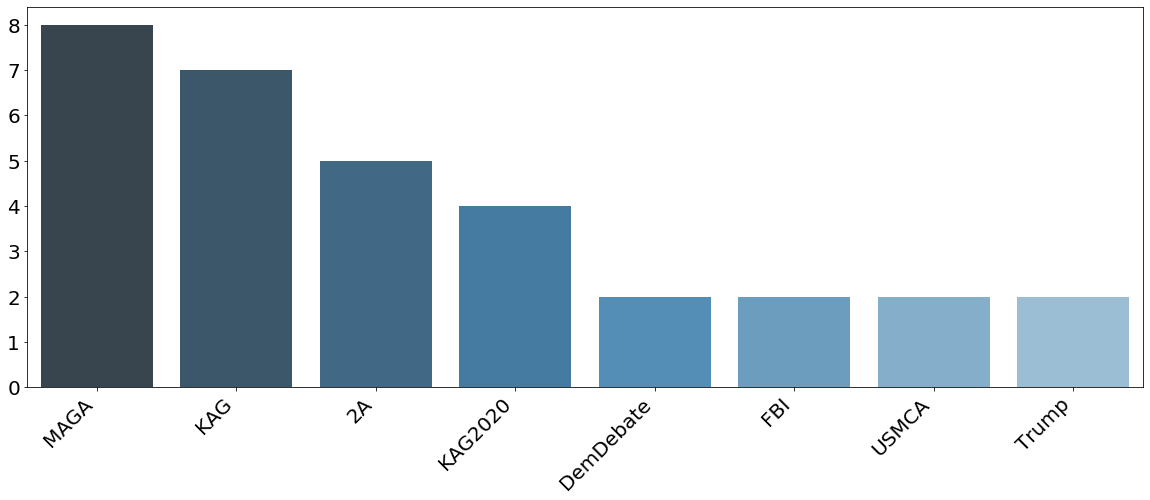

In [620]:
hashtags_dic = {}
for hsh_list in hashtags_col:
    for d in hsh_list:
        k = d['text']
        if k not in hashtags_dic.keys():
            hashtags_dic[k] = 0
        hashtags_dic[k] +=1
            
sorted_d = dict(sorted(hashtags_dic.items(), key=operator.itemgetter(1),reverse=True))
remove_ones = {key:val for key, val in sorted_d.items() if val>1}
tags = list(remove_ones.keys())
values = list(remove_ones.values())
plt.figure(figsize=(20,7))
plot = sns.barplot(tags, values, palette="Blues_d")
#plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='20'  
    )
plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='20'  
    )
plt.savefig('../plots/hashtag_counting.png', bbox_inches = "tight")

# Keywords analysis

In [616]:
def find_keywords_occurrencies(list_of_keyw):
    text_col = raw_data['full_text']
    text_col[0]
    count_keywords = {}
    for k in list_of_keyw:
        for tweet in text_col:
            if k not in count_keywords.keys():
                count_keywords[k] = 0
            count_keywords[k] += tweet.lower().count(k.lower())
    sorted_c = dict(sorted(count_keywords.items(), key=operator.itemgetter(1),reverse=True))
    return sorted_c
   
def plot_keywords(dic, palette, fname):
    tags = list(dic.keys())
    values = list(dic.values())
    fig, ax = plt.subplots(figsize=(20, 7))
    plot = sns.barplot(tags, values, palette=palette)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='20'  
    )
    plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='20'  
    )
    plt.ylim(0, 450)
    plt.savefig(f'../plots/{fname}.png', bbox_inches = "tight")
    

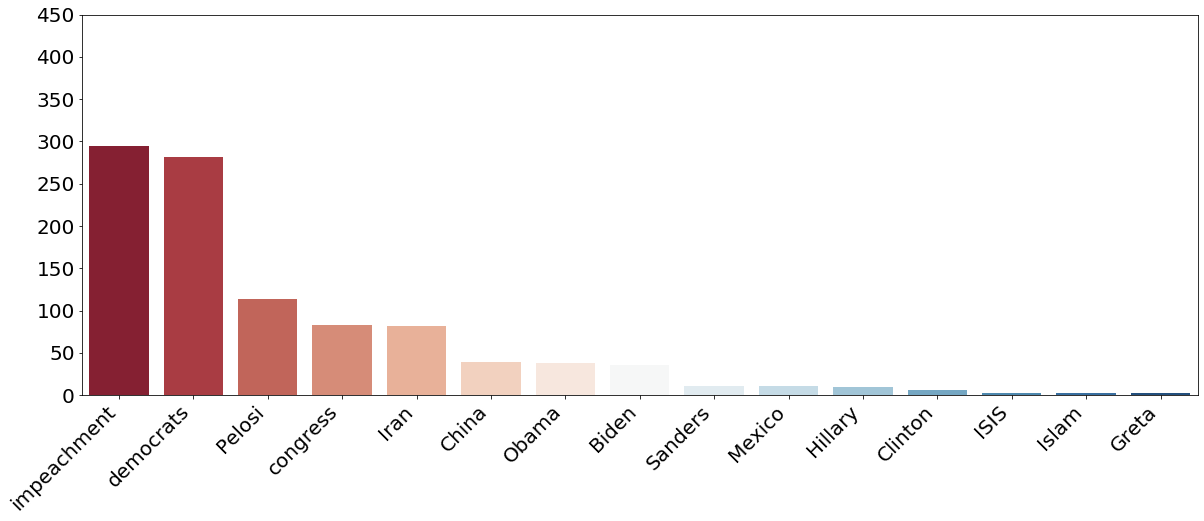

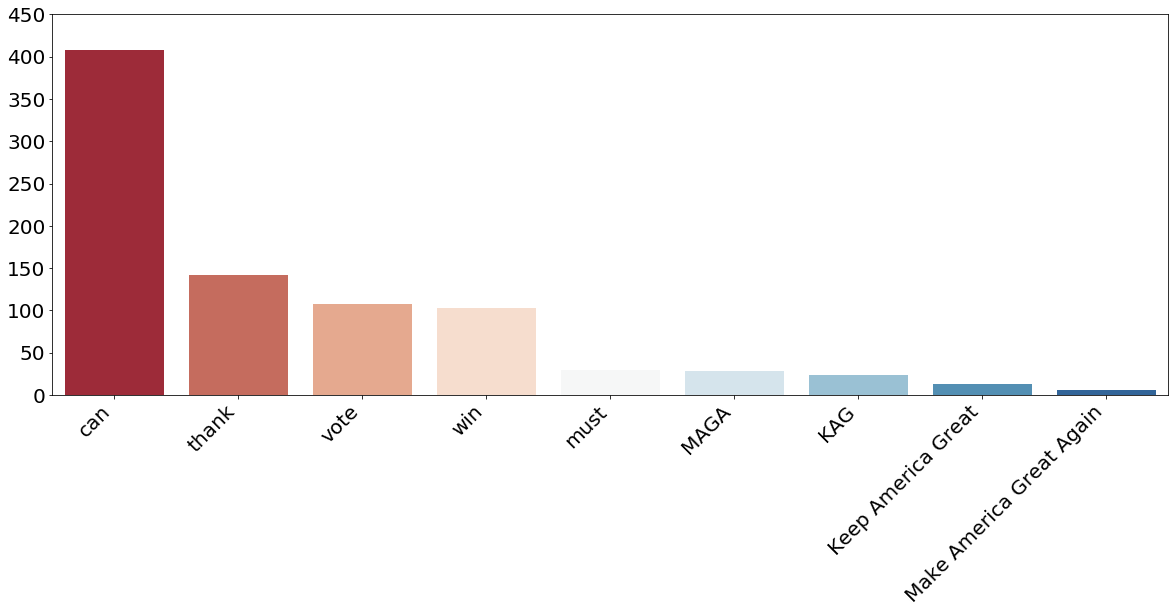

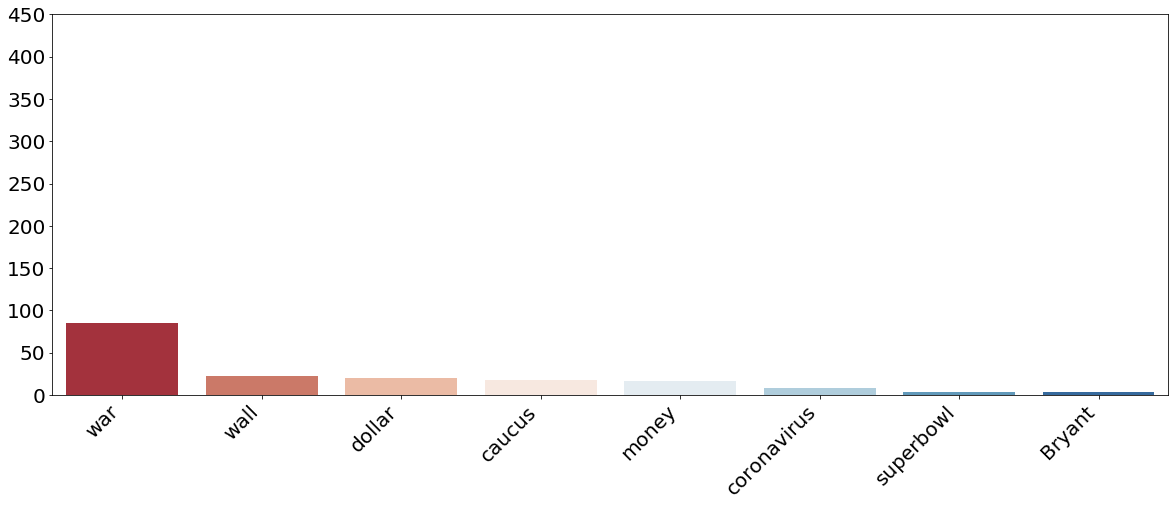

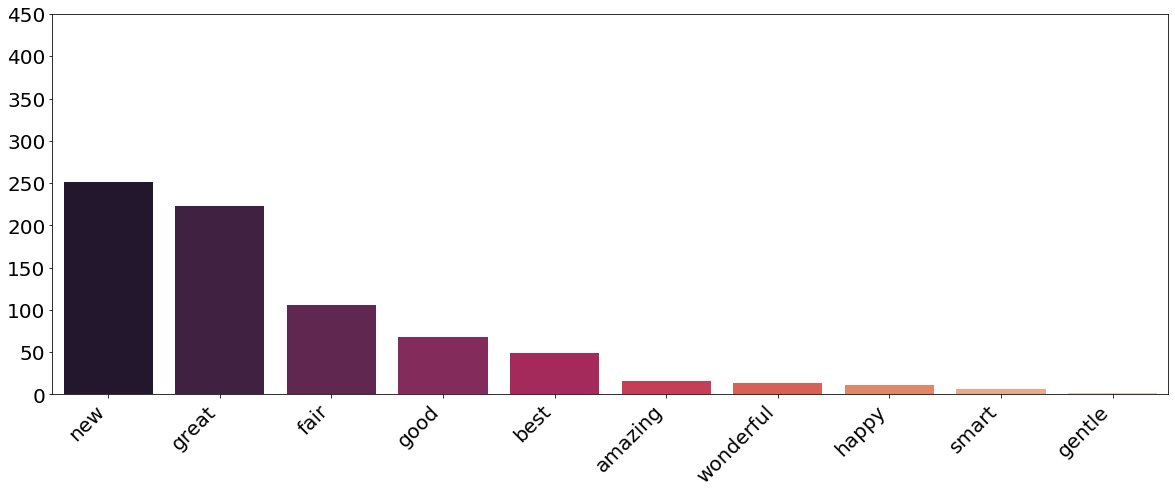

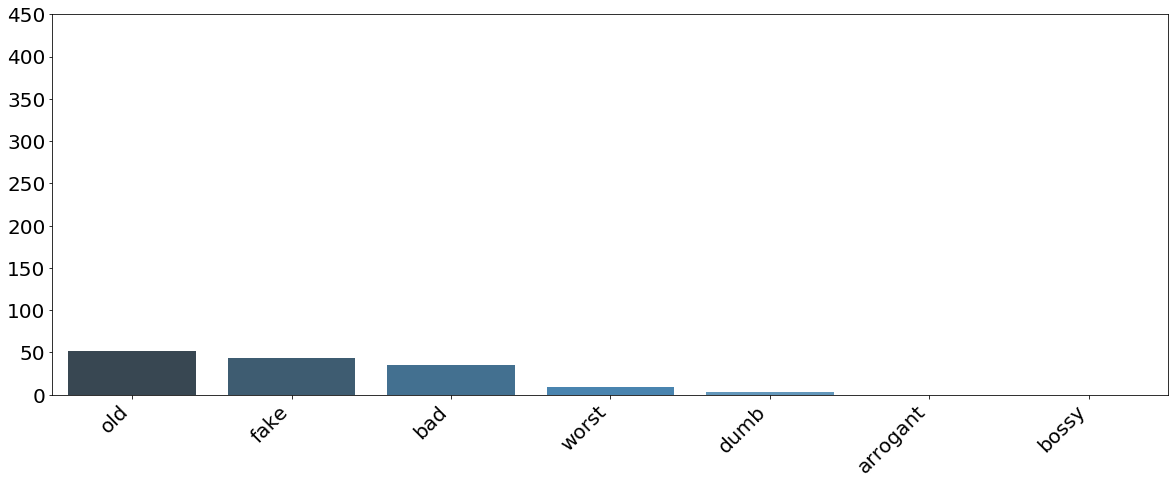

In [617]:
keywords_enemies = ['Obama', 'Pelosi', 'Clinton', 'Hillary', 'Biden', 'Iran', 'democrats', 'Greta', 'China', 'Sanders', 'congress','impeachment', 'Mexico', 'ISIS', 'Islam']
keywords_verbs = ['win', 'must', 'can', 'thank', 'vote', 'Make America Great Again', 'Keep America Great', 'MAGA', 'KAG']
keywords_other = ['wall', 'war', 'caucus', 'dollar', 'money', 'coronavirus', 'superbowl', 'Bryant']
keywords_positive = ['good', 'new', 'best', 'great', 'fair', 'smart', 'amazing', 'gentle', 'happy', 'wonderful', 'fair']
keywords_negative = ['bad', 'old', 'worst', 'dumb', 'fake', 'arrogant', 'bossy']

dic_enemies = find_keywords_occurrencies(keywords_enemies)
plot_keywords(dic_enemies, "RdBu", 'enemies')

dic_verbs = find_keywords_occurrencies(keywords_verbs)
plot_keywords(dic_verbs, "RdBu", 'verbs_motto')

dic_other = find_keywords_occurrencies(keywords_other)
plot_keywords(dic_other, "RdBu", 'miscellanea')

dic_pos = find_keywords_occurrencies(keywords_positive)
plot_keywords(dic_pos, "rocket", "positive")

dic_neg = find_keywords_occurrencies(keywords_negative)
plot_keywords(dic_neg, "Blues_d", "negative")


# Retweets analysis

15829.45259799453


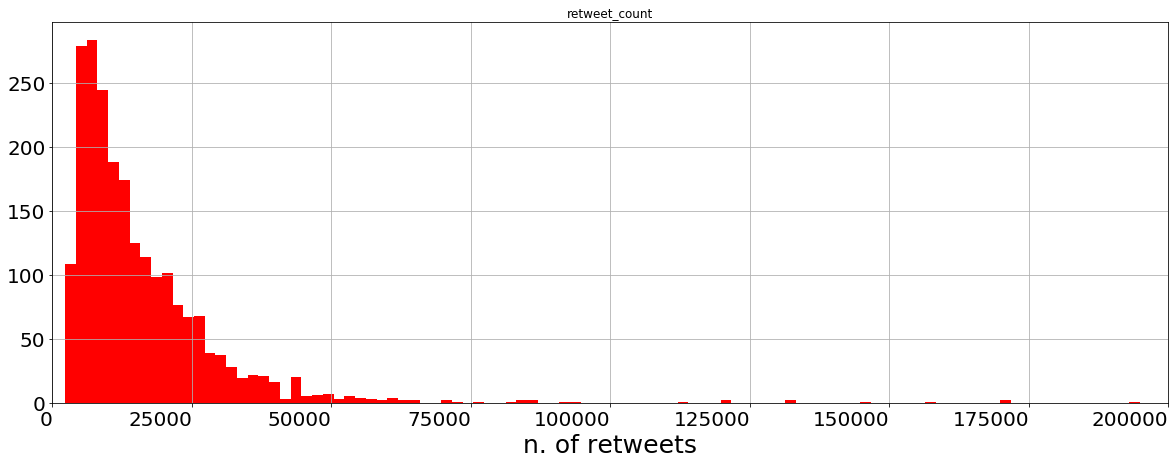

In [585]:
fig, ax = plt.subplots(figsize=(20, 7))
hist = raw_data.hist(column='retweet_count', bins=100, grid=True, figsize=(15,7), color='r', ax=ax)
ax.set_xlabel('n. of retweets', fontsize=25)
ax.set_xlim(0,2e5)
plt.xticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='20'  
    )
plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='20'  
    )
mean = raw_data["retweet_count"].mean()
t = f'mean={mean:.0f}'
#plt.text(50000, 150, t, fontsize=18)
print(mean)
plt.savefig('../plots/n_retweets_distribution.png', bbox_inches = "tight")

In [511]:
data_sort = raw_data.sort_values(by='retweet_count', ascending=False)
data_sort = raw_data.iloc[:10]
data_sort_lim = data_sort[['retweet_count', 'id', 'id_str']].iloc[:10].sort_values(by='retweet_count', ascending=False).reset_index(drop=True)
data_sort_lim
id_string = data_sort_lim[['id_str']]
id_string

,id_str
0,1227423392078409728
1,1227420618951479297
2,1227426937368432640
3,1227423994250436609
4,1227453711540269057
5,1227427722441510912
6,1227432921788801024
7,1227443801599418370
8,1227441882793480196
9,1227427104129798145


In [513]:
for idst in id_string['id_str']:
    response = twitter_client.get_retweets(id = idst)
    df = json_normalize(response)
    filename = f'../data/raw_data_{idst}_retweet.csv'
    save_df = df.to_csv(filename, index=False)